### _ipywidgets_ examples:
https://stackoverflow.com/questions/34020789/ipywidgets-dropdown-widgets-what-is-the-onchange-event

# <center> ALPS </center>

<font size="4"><br />This Jupyter Notebook provides the code for the following (Approximation by Localized Penalized Splines) ALPS framework functionalities:<br /><br />

1. [Using GCV to fit the ALPS model<br /><br />](#section_1)
1. [Using REML to fit the ALPS model<br /><br />](#section_2)
1. [Outlier detection in time series using two stage strategy<br /><br />](#section_3)
1. [Segregation of low frequency and high frequency effects<br /><br />](#section_4)
1. [Computation of first derivative for the produced approximation](#section_5)
</font>

### Select Kernel Restart & Run All to initialize the notebook

### Click the Hide / Show Code Cells button to hide / show the code cells<br />

In [1]:
from hublib import ui
hideCodeButton = ui.HideCodeButton(style = 'success')
#help (hideCodeButton)
display (hideCodeButton)

<IPython.core.display.Javascript object>

Button(button_style='success', description='Hide Code Cells', style=ButtonStyle())

In [2]:
# Importing the libraries

import sys
#print (sys.path)
import os
from importlib import reload

# Notes for running Jupyter on Debian 10:
# See: https://github.com/scipy/scipy/issues/11403
#import scipy
#print (scipy.__version__) # Jupyter Notebook: 1.3.0, Jupyter on Debian 10: 1.5.2, geospatial-plus python3 Kernel: 1.7.1
# Workaround:
#sys.path.insert (0,'/apps/share64/debian10/anaconda/anaconda-6/envs/volcashexpwf_anaconda_6/lib/python3.7/site-packages')
#print (scipy.__version__) # 1.3.1
# Note: For running Jupyter on Debian 10, also need to open a ticket to enable the tool to run in AppMode. Also see ./middleware/invoke.
# Note: The previous two cells can get removed when running Jupyter on Debian 10

from pathlib import Path
import pickle
import matplotlib.pyplot as plt
from IPython.display import HTML
import ipywidgets as widg

%matplotlib inline
plt.ioff()

import files
import functions as func
import plotting
import widgets

# Setup paths to the bin and data directories
self_tooldir = files.DIR_PROJECT
self_bindir = files.DIR_BIN
# TODO 6/15: what does below do?
sys.path.insert (1, self_bindir)
self_datadir = files.DIR_SAMPLE_DATA

In [3]:
#prints Functions.py to the functions_ouput window
functions_output = widg.Output()
functions_file = os.path.join(self_bindir, "functions.py")
def show_functions(change):

    if showmore_button.description == 'Show Functions.py':
        
        showmore_button.description = 'Hide Functions.py'
        with functions_output:
            f = open(functions_file,'r')
            for line in f:
                print(line.rstrip())
            f.close()
    else:
        
        showmore_button.description = 'Show Functions.py'
        functions_output.clear_output()
        
showmore_button = widg.Button(description = 'Show Functions.py', button_style = 'success')
showmore_button.on_click(show_functions)


### Click the Hide / Show Functions.py button to see the foundational functions on which these higher level ALPS framework functionalities are built

In [4]:
display(functions_output)
display(showmore_button)

Output()

Button(button_style='success', description='Show Functions.py', style=ButtonStyle())

## Select Your Data

In [5]:
reload(files)

<module 'files' from '/Users/ashleyjeon/Documents/GitHub/ALPS2/src/files.py'>

In [6]:
d = widgets.DataSelector()
d

DataSelector(children=(HBox(children=(Label(value='Select data source:'), Button(description='Sample', style=B…

<a name="section_1"></a>
## <br />1. Using GCV to fit the ALPS model[$\tiny\uparrow$](#top)

In [15]:
reload(files)

<module 'files' from '/Users/ashleyjeon/Documents/GitHub/ALPS2/src/files.py'>

In [16]:
f1 = plt.figure(figsize=(12,7))

In [17]:
form = plotting.conf_gcv(f1, d.data, test=False)
display(form)

TypeError: Unknown data type passed (<class 'NoneType'>); data must be a 2 column numpy array or pandas DataFrame

<a name="section_2"></a>
## <br />2. Using REML to Fit the ALPS Model[$\tiny\uparrow$](#top)

In [9]:
f2 = plt.figure(figsize=(9,5))

In [10]:
form = plotting.conf_reml(f2, data, test=False)
display(form)

FormConfigIO(children=(Integer(children=(HTML(value='<div data-toggle="popover" title="" data-container="body"…

<a name="section_3"></a>
## <br />3. Outlier Detection in Time Series using Two Stage Strategy[$\tiny\uparrow$](#top)

In [10]:
f3 = plt.figure(figsize=(15,5))

In [11]:
form = plotting.conf_two_stage(f3, data, test=False)
display(form)

NameError: name 'data' is not defined

<a name="section_4"></a>
## <br />4. Mixed Model Formulation for getting Local and Global Effects[$\tiny\uparrow$](#top)

In [31]:
f4 = plt.figure(figsize=(15,5))

In [33]:
form = plotting.conf_mmf(f4, d.data, test=False)
display(form)

FormConfigIO(children=(Integer(children=(HTML(value='<div data-toggle="popover" title="" data-container="body"…

<IPython.core.display.Javascript object>

<a name="section_5"></a>
## <br />5. Computation of First Derivative with CIs[$\tiny\uparrow$](#top)

Here we show the capability of ALPS to compute the first order derivative. Actually its even possible to compute derivatives of higher order by changing the order in the main code.

In [33]:
data = files.load_pickle(files.DIR_SAMPLE_DATA/'ts1.p')

<IPython.core.display.Javascript object>


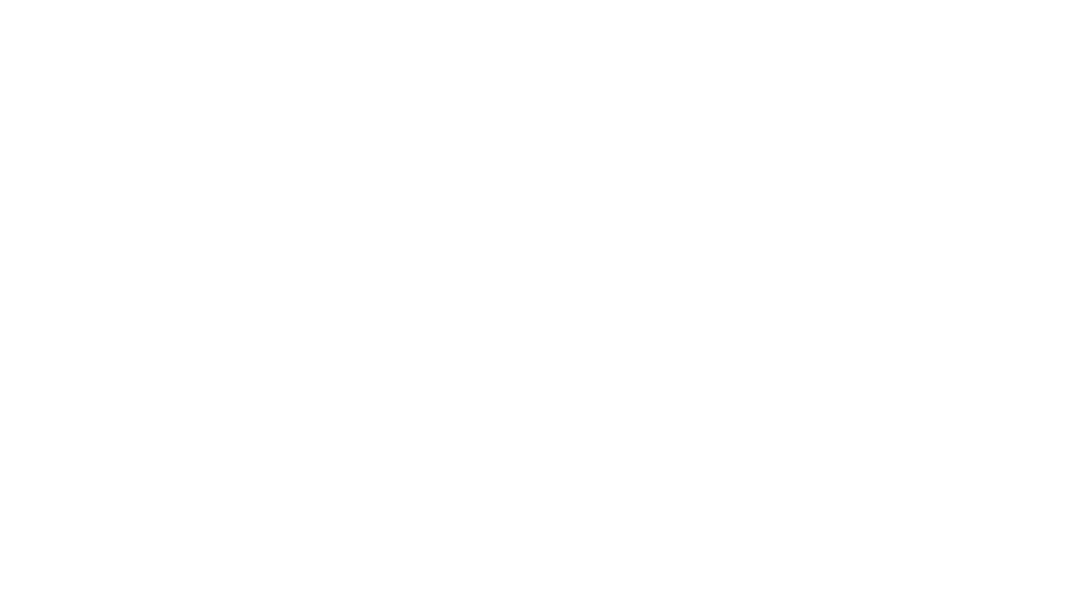

In [32]:
f5 = plt.figure(figsize=(9,5))

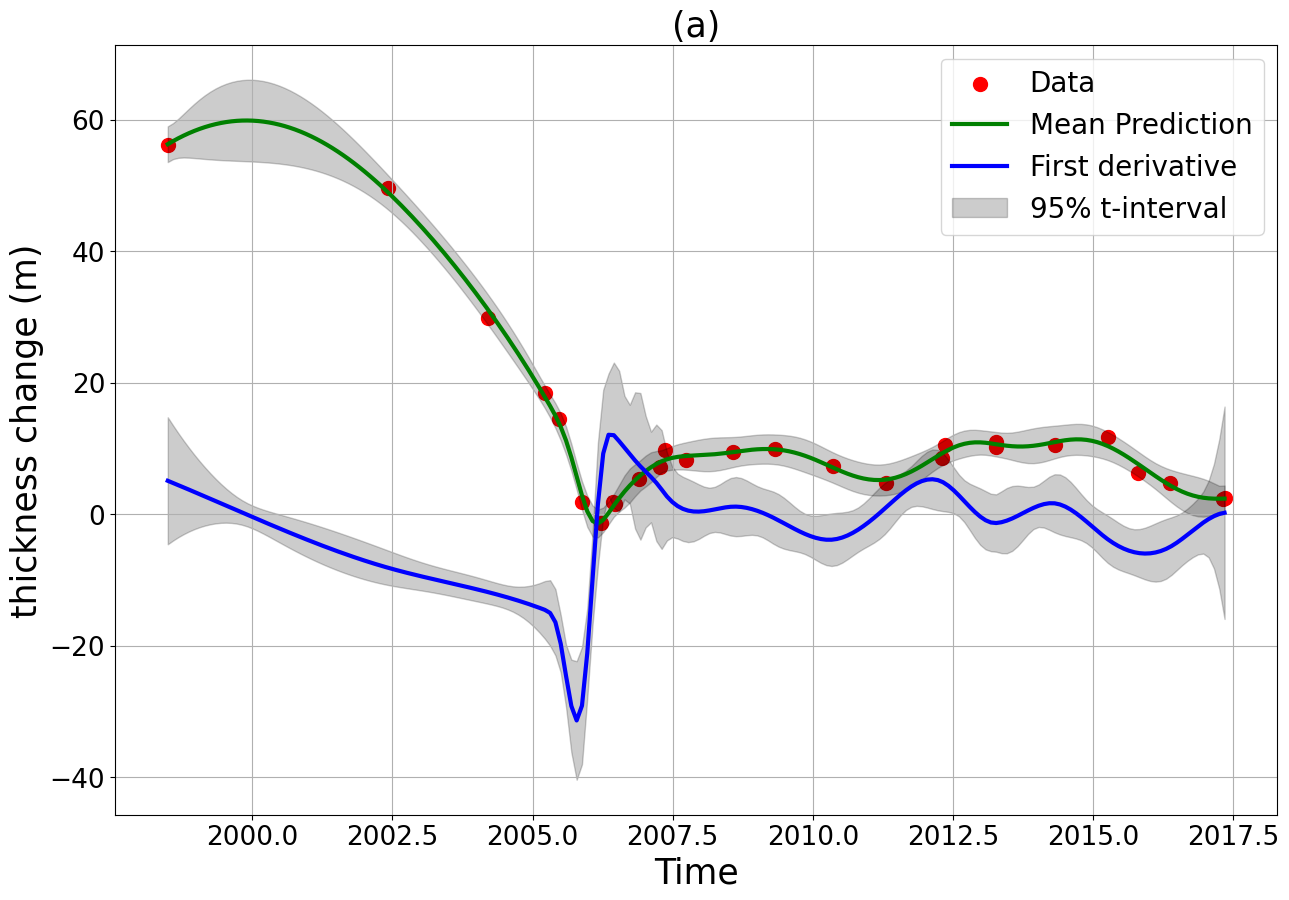

In [17]:
# Fitting and plotting
f1 = figure(figsize=(15,10))
ax = subplot2grid((1,1),(0,0))

p = 4;q=2
[n,lamb,sigmasq] = func.Myopic_search(Data1,p,q)
c = n+p
U = func.Kno_pspline_opt(Data1,p,n)
B = func.Basis_Pspline(n,p,U,Data1[:,0])
P = func.Penalty_p(q,c)
theta = np.linalg.solve(B.T.dot(B) + lamb*P, B.T.dot(Data1[:,1].reshape(-1,1)))
### Getting mean of the prediction
num = 200
xpred = func.linspace(Data1[0,0],Data1[-1,0],num)
Bpred = func.Basis_Pspline(n,p,U,xpred)
ypred1 = Bpred.dot(theta)
std_t1,std_n1 = func.Var_bounds(Data1,Bpred,B,theta,P,lamb)
## Getting the derivative
Bpred_dert = func.Basis_derv_Pspline(n,p,U,xpred)
ypred_derth = Bpred_dert.dot(theta)
std_th_derv,std_nh_derv = func.Var_bounds(Data1,Bpred_dert,B,theta,P,lamb)


## Plotting
ax.scatter(Data1[:,0],Data1[:,1],color = 'r',s = 100,label = 'Data')
ax.plot(xpred,ypred1,linewidth=3,color = 'g',label = 'Mean Prediction')
ax.plot(xpred,ypred_derth,linewidth=3,color = 'b',label = 'First derivative')
ax.set_title('(a)',size = 25)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('Time',size=25)
ax.set_ylabel('thickness change (m)',size = 25)
ax.fill_between(xpred.flatten(),ypred1.flatten()-std_t1,ypred1.flatten()+std_t1, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.fill_between(xpred.flatten(),ypred_derth.flatten()-std_th_derv,ypred_derth.flatten()+std_th_derv, alpha = 0.2,color = 'k')


ax.legend(fontsize=20)
ax.grid(True)
show()


In [18]:
# Prevent In[] and Out[] from displaying on left
HTML('''
<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>
''')

In [19]:
# Scroll to top when the notebook is loaded
HTML('''
<script>
    function scroll_to_top() {
        Jupyter.notebook.scroll_to_top();
    } 
    $( window ).on( "load", scroll_to_top() );
</script>
''')